In [2]:
from __future__ import print_function
import json
import os.path
import random as ra
import tensorflow as tf
import numpy as np
import keras
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Input, Dense, Dropout, BatchNormalization, Reshape, Lambda, Embedding, LSTM, Conv2D, MaxPooling2D, TimeDistributed, RepeatVector, Concatenate, Multiply
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, TensorBoard
from scipy import ndimage, misc
from imageio import imread
from keras.utils.vis_utils import plot_model
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


Using TensorFlow backend.


In [3]:
json1_file = open('Training/Quest_Answers.json')

In [4]:
json1_str = json1_file.read()

In [5]:
json1_data = json.loads(json1_str)

In [6]:
json1_data = json1_data['quest_answers']

In [7]:
len(json1_data)

135020

In [10]:
q=[a['Question'] for a in json1_data ]

In [22]:
len(q)

135020

In [36]:
lens = []
for i in range (len(q)):
    lens.extend(q[i].split())

In [41]:
lens[0:5]

['There', 'is', 'a', 'metal', 'thing']

In [42]:
from collections import Counter 

In [43]:
Counter = Counter(lens) 

In [52]:
most_occur = Counter.most_common(115) 
  
print(most_occur) 

[('the', 348314), ('is', 144688), ('of', 142252), ('that', 79365), ('same', 68596), ('as', 61568), ('thing', 43831), ('big', 42187), ('object', 41881), ('are', 41818), ('rubber', 39696), ('large', 39479), ('tiny', 39446), ('matte', 39221), ('small', 38922), ('What', 35438), ('a', 33043), ('There', 30215), ('number', 29080), ('left', 28754), ('behind', 28630), ('right', 28513), ('in', 28472), ('front', 28472), ('there', 27403), ('what', 26588), ('metallic', 26506), ('metal', 26384), ('shiny', 26197), ('things', 23554), ('brown', 22984), ('shape', 22920), ('red', 22734), ('color', 22685), ('purple', 22638), ('cyan', 22468), ('cylinder', 22459), ('green', 22409), ('gray', 22358), ('yellow', 22267), ('blue', 22010), ('size', 21623), ('objects', 21256), ('Is', 20800), ('material', 20767), ('to', 19161), ('on', 19119), ('side', 19119), ('have', 16962), ('thing?', 16799), ('object?', 16727), ('How', 16214), ('many', 16018), ('and', 15616), ('Are', 15404), ('cylinder?', 14372), ('other', 13868

In [45]:
len(lens)

2473483

In [46]:
setlens = set(lens)

In [48]:
len(setlens)

115

In [24]:
isinstance(1,bool)

False

In [47]:
for i in range(len(p)):
    if (p[i] is False):
        p[i] = 'False'
    if (p[i] is True):
        p[i] = 'True'

In [49]:
p = set(p)

In [51]:
len(p)

26

In [41]:
0 is False

False

In [52]:
p

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 'False',
 'True',
 'blue',
 'brown',
 'cube',
 'cyan',
 'cylinder',
 'gray',
 'green',
 'large',
 'metal',
 'purple',
 'red',
 'rubber',
 'small',
 'sphere',
 'yellow'}

In [42]:
False is 0

False

In [58]:
array(q)

array(['0', 'False', 'large', ..., '0', '0', '1'], dtype='<U11')

In [59]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(q)
# print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

C:\Users\Rohan\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [66]:
onehot_encoded[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
 label_encoder.inverse_transform([argmax(2)])

In [64]:
q

[0,
 False,
 'large',
 'cylinder',
 'cyan',
 'metal',
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 0,
 1,
 2,
 1,
 False,
 False,
 True,
 True,
 0,
 0,
 1,
 0,
 'purple',
 'rubber',
 'cylinder',
 'small',
 'metal',
 'cylinder',
 'large',
 'brown',
 'sphere',
 'small',
 'green',
 'rubber',
 2,
 False,
 'small',
 'cyan',
 'rubber',
 'cylinder',
 0,
 'small',
 'red',
 'metal',
 'cylinder',
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 False,
 'small',
 'brown',
 'rubber',
 'cube',
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 0,
 False,
 'cylinder',
 'rubber',
 'cyan',
 'small',
 1,
 True,
 'small',
 'cube',
 'brown',
 True,
 False,
 True,
 False,
 True,
 'rubber',
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 2,
 0,
 1,
 0,
 True,
 True,
 False,
 False,
 1,
 1,
 2,
 2,
 'cyan',
 'sphere',
 'large',
 'rubber',
 'sphere',
 'small',
 'green',
 'cube',
 0,
 True

In [25]:
tf.VERSION

'1.12.0'

In [43]:
False is False

True

In [26]:
path = 'Training'

In [37]:
lab = {}


In [27]:
def load_data(n, vocab_size, sequence_length, tokenizer=None):
    # Dataset paths
    # 	path = '/'
    questions_path = path + '/Quest_Answers.json'
#     subset_questions_path = path + '/subsetQs' + '.json'
    images_path = path + '/images/' 

    x_text = []     # List of questions
    x_image = []    # List of images
    y = []          # List of answers
    num_labels = 0  # Current number of labels, used to create index mapping
    labels = {}     # Dictionary mapping of ints to labels
    images = {}     # Dictionary of images, to minimize number of imread ops

    # Attempt to load saved JSON subset of the questions
    print('Loading data...')

 
    with open(questions_path) as f:
        data = json.load(f)

    data = data['quest_answers'][0:n]
    print('JSON subset saved to file...')

    # Store image data and labels in dictionaries
    print('Storing image data...')

    for q in data[0:n]:
        # Create an index for each answer
        if not q['Answer'] in labels :
            labels[q['Answer']] = num_labels
            num_labels += 1
        

        # Create an index for each image
        if not q['Image'] in images:
            images[q['Image']] = imread(images_path + q['Image'] + '.png', pilmode='RGB')

        x_text.append(q['Question'])
        x_image.append(images[q['Image']])
        y.append(labels[q['Answer']])

    # Convert question corpus into sequential encoding for LSTM
    print('Processing text data...')

    if not tokenizer:
        tokenizer = Tokenizer(num_words=vocab_size)

    tokenizer.fit_on_texts(x_text)
    sequences = tokenizer.texts_to_sequences(x_text)
    x_text = sequence.pad_sequences(sequences, maxlen=sequence_length)

    # Convert x_image to np array
    x_image = np.array(x_image)

    # Convert labels to categorical labels
    y = keras.utils.to_categorical(y, num_labels)
    print(len(data))
    print('Text: ', x_text.shape)
    print('Image: ', x_image.shape)
    print('Labels: ', y.shape)
    print(num_labels)
    return ([x_text, x_image], y), num_labels, tokenizer


In [28]:
def process_image(x):
    target_height, target_width = 128, 128
#     rotation_range = .05  # In radians
#     degs = ra.uniform(-rotation_range, rotation_range)
    x = tf.image.resize_images(x, (target_height, target_width), method=tf.image.ResizeMethod.AREA)
#     x = tf.contrib.image.rotate(x, degs)
    return x

In [29]:
def get_relation_vectors(x):
    objects = []
    relations = []
    shape = K.int_shape(x)
    k = 30     # Hyperparameter which controls how many objects are considered
    keys = []

    # Get k unique random objects
    while k > 0:
        i = ra.randint(0, shape[1]-1)
        j = ra.randint(0, shape[2]-1)
        if not (i, j) in keys:
            keys.append((i, j))
            objects.append(x[:, i, j, :])
            k -= 1

    # Concatenate each pair of objects to form a relation vector
    for i in range(len(objects)):
        for j in range(i, len(objects)):
            relations.append(K.concatenate([objects[i], objects[j]], axis=1))

    # Restack objects into Keras tensor [batch, relation_ID, relation_vectors]
    return K.permute_dimensions(K.stack([r for r in relations], axis=0), [1, 0, 2])


In [34]:
samples = 20000

In [35]:
learning_rate = .00025
vocab_size = 512
sequence_length = 64
img_rows, img_cols = 120, 160
image_input_shape = (img_rows, img_cols, 3)

In [36]:
(x_train, y_train), num_labels, tokenizer = load_data(samples, vocab_size, sequence_length)

Loading data...
JSON subset saved to file...
Storing image data...
Processing text data...
20000
Text:  (20000, 64)
Image:  (20000, 120, 160, 3)
Labels:  (20000, 24)
24


In [17]:
text_inputs = Input(shape=(sequence_length,), name='text_input')
text_x = Embedding(vocab_size, 128)(text_inputs)
text_x = LSTM(128,return_sequences=True,activation='tanh')(text_x)
text_x = Dropout(0.5)(text_x)
text_x = LSTM(128)(text_x)



LSTM above
CNN Below

In [18]:
image_inputs = Input(shape=image_input_shape, name='image_input')
image_x = Lambda(process_image)(image_inputs)
print(image_x)
image_x = Conv2D(8, kernel_size=(3, 3), strides=1, activation='relu')(image_x)
image_x = BatchNormalization()(image_x)
image_x = Conv2D(8, kernel_size=(3, 3), strides=1, activation='relu')(image_x)
image_x = BatchNormalization()(image_x)
image_x = MaxPooling2D(pool_size=2)(image_x)

image_x = Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu')(image_x)
image_x = BatchNormalization()(image_x)
image_x = Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu')(image_x)
image_x = BatchNormalization()(image_x)
image_x = MaxPooling2D(pool_size=2)(image_x)

print(image_x)
shape = K.int_shape(image_x)

Tensor("lambda_1/resize_images/ResizeArea:0", shape=(?, 128, 128, 3), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 29, 29, 16), dtype=float32)


In [19]:
print(shape)

(None, 29, 29, 16)


In [20]:
K.int_shape(image_x)

(None, 29, 29, 16)

In [21]:
K.int_shape(text_x)[1]

128

RN below


In [22]:
RN_inputs = Input(shape=(1, (2 * shape[3]) + K.int_shape(text_x)[1]))
RN_x = Dense(256, activation='relu')(RN_inputs)
RN_x = Dense(256, activation='relu')(RN_x)
RN_x = Dense(256, activation='relu')(RN_x)
RN_x = Dropout(.5)(RN_x)
RN_outputs = Dense(256, activation='relu')(RN_x)
RN = Model(inputs=RN_inputs, outputs=RN_outputs)

In [23]:
# image_x.shape
get_relation_vectors(image_x)

<tf.Tensor 'transpose:0' shape=(?, 465, 32) dtype=float32>

In [24]:
#
# Implements g_theta
#
relations = Lambda(get_relation_vectors)(image_x)           # Get tensor [batch, relation_ID, relation_vectors]
question = RepeatVector(K.int_shape(relations)[1])(text_x)  # Shape question vector to same size as relations
relations = Concatenate(axis=2)([relations, question])      # Merge tensors [batch, relation_ID, relation_vectors, question_vector]
g = TimeDistributed(RN)(relations)                          # TimeDistributed applies RN to relation vectors.
g = Lambda(lambda x: K.sum(x, axis=1))(g) # Sum over relation_ID

In [25]:
#
# Define f_phi
#
f = Dense(256, activation='relu')(g)
f = Dropout(.5)(f)
f = Dense(256, activation='relu')(f)
f = Dropout(.5)(f)
outputs = Dense(num_labels, activation='softmax')(f)


In [32]:

model = Model(inputs=[text_inputs, image_inputs], outputs=outputs) 
print(model.summary())
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           image_input[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 126, 126, 8)  224         lambda_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 126, 126, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [33]:
plot_model(model)

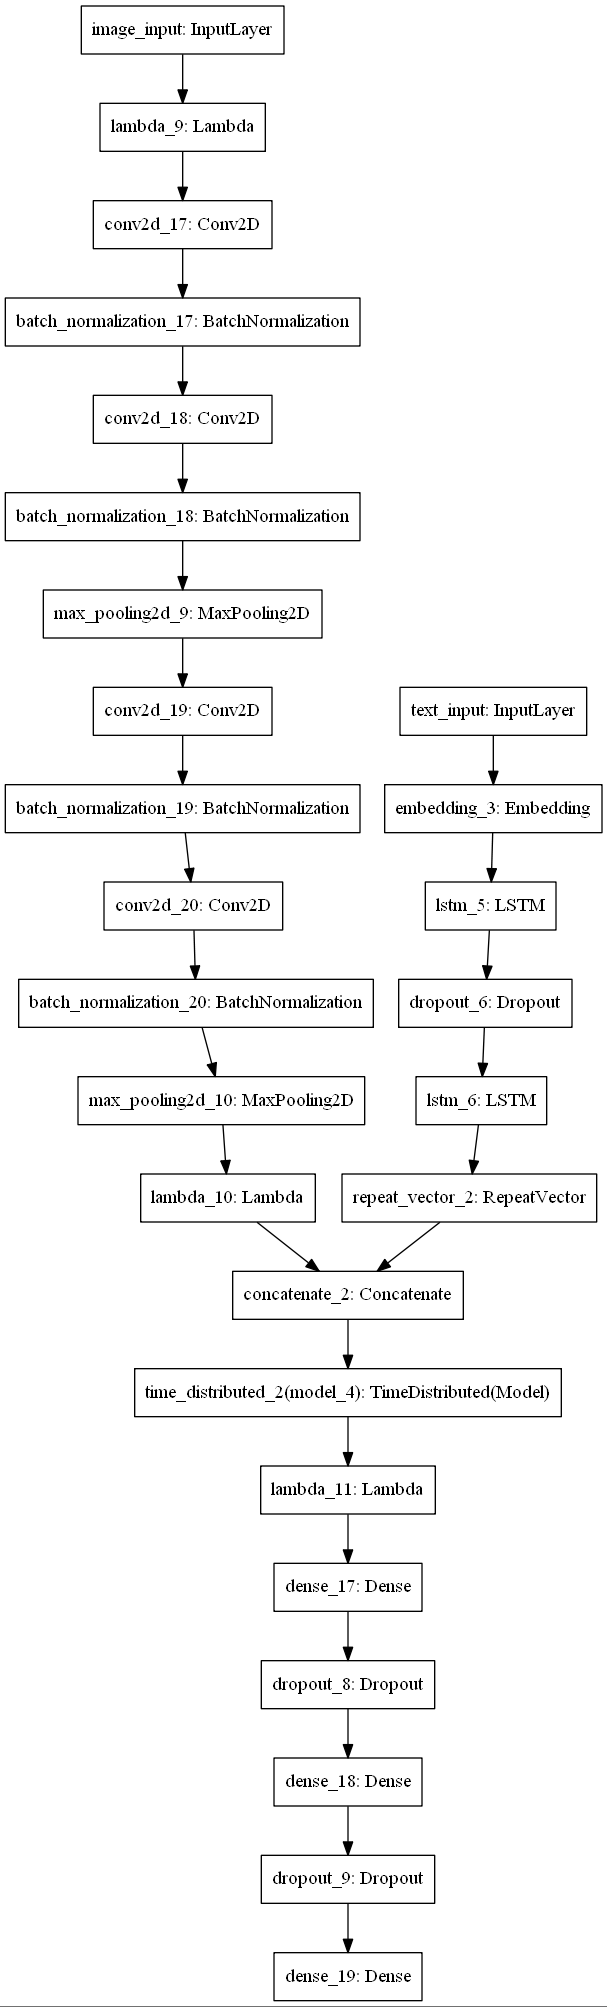


In [34]:
epochs = 1
batch_size = 256


In [35]:
model.fit(x_train, y_train, validation_split=0.01,
	      batch_size=batch_size, 
	      epochs=epochs, 
	      shuffle=True)

Train on 99000 samples, validate on 1000 samples
Epoch 1/1
99000/99000 [==============================] - 199s 2ms/step - loss: 2.9160 - acc: 0.2984 - val_loss: 1.5390 - val_acc: 0.3450


In [37]:
model.fit(x_train, y_train, validation_split=0.01,
	      batch_size=batch_size, 
	      epochs=epochs*3, 
	      shuffle=True)

Train on 99000 samples, validate on 1000 samples
Epoch 1/3
99000/99000 [==============================] - 195s 2ms/step - loss: 1.4336 - acc: 0.3623 - val_loss: 1.1575 - val_acc: 0.3930
Epoch 2/3
99000/99000 [==============================] - 197s 2ms/step - loss: 1.2152 - acc: 0.3899 - val_loss: 1.0494 - val_acc: 0.4440
Epoch 3/3
99000/99000 [==============================] - 196s 2ms/step - loss: 1.0832 - acc: 0.4183 - val_loss: 1.0073 - val_acc: 0.4180


In [41]:
model.save('Models_nnfl/model_4180_1lakh.h5')